In [1]:
# general imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

import plotly.express as px

# Mlxtend library
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

from utils.util_ar import *

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

<br><br>

## **Data Acquisition**

In the cell below, the path to the data directory is defined.

In [2]:
path = ("./data/")

We import the data using a pandas function called 'read_csv'. This function utilizes the path held in the variable in the cell above, indicating the specific location where the data is stored. The respective datasets are stored in 'info', 'basket' and 'means_clusters'.

In [3]:
info = pd.read_csv(path + "cluster_info.csv") 
basket = pd.read_csv(path + "Customer Basket Dataset.csv") 
means_clusters = pd.read_csv(path+ "cluster_means.csv")

We merged the 'info' and 'basket' dataframes into a dataframe called 'ar_df' (association rules dataframe) in order to access the items purchased by each customer.

In [4]:
ar_df = pd.merge(info,basket, on= "customer_id", how="inner")

Throughout the process of creation of the respective dataframe, it was noted that certain customers that are present on the 'info' data set are not included on the 'basket'. 

In the cell below the mean of each cluster for the different numeric variables is displayed with the usage of the 'means_clusters' dataframe defined in the clustering notebook and the method `.T` previously mentioned.

In [5]:
means_clusters.T

0           1  \
number_complaints                            0.000000    4.139610   
distinct_stores_visited                      1.000000    1.000000   
lifetime_spend_groceries                     2.701888  199.211039   
lifetime_spend_electronics                   1.149657    9.948052   
typical_hour                                 0.625775   10.048701   
lifetime_spend_vegetables                    2.124256  100.224026   
lifetime_spend_nonalcohol_drinks             2.302029   99.925325   
lifetime_spend_alcohol_drinks                2.704794  296.506494   
lifetime_spend_meat                          2.616000   49.402597   
lifetime_spend_fish                      34999.035714   51.175325   
lifetime_spend_hygiene                       1.553728   49.707792   
lifetime_spend_videogames                    0.000000    0.000000   
lifetime_total_distinct_products             0.978300  100.538961   
percentage_of_products_bought_promotion      0.200193    0.199909   
years_as_customer                           12.977679   13.256494   
customer_age                                50.566964   71.399351   
num_kids                                     0.000000    1.022727   
total_spend                              35014.188067  856.100649   

                                                   2            3  \
number_complaints                           0.000000     0.496021   
distinct_stores_visited                     2.000000     2.011494   
lifetime_spend_groceries                  100.346955   617.420866   
lifetime_spend_electronics                 19.899038   611.014589   
typical_hour                               21.606571    13.907162   
lifetime_spend_vegetables                  20.133814   302.609637   
lifetime_spend_nonalcohol_drinks          199.929487   302.498674   
lifetime_spend_alcohol_drinks             900.553686   298.152962   
lifetime_spend_meat                        49.848558   199.534925   
lifetime_spend_fish                        49.891026   199.086207   
lifetime_spend_hygiene                     49.731571    50.158267   
lifetime_spend_videogames                 100.166667   199.990274   
lifetime_total_distinct_products           79.710737    58.268789   
percentage_of_products_bought_promotion     0.199982     0.100307   
years_as_customer                           6.100962    13.029178   
customer_age                               22.994391    52.390363   
num_kids                                    0.016026     1.029178   
total_spend                              1490.500801  2780.466401   

                                                    4            5  \
number_complaints                            0.018486     0.500000   
distinct_stores_visited                      3.009683     1.992625   
lifetime_spend_groceries                  6998.608715   200.406291   
lifetime_spend_electronics                1002.705986  4999.557484   
typical_hour                                18.956426    20.951844   
lifetime_spend_vegetables                  402.549736    20.033623   
lifetime_spend_nonalcohol_drinks           400.469190  1500.946855   
lifetime_spend_alcohol_drinks              402.982394   499.866161   
lifetime_spend_meat                        699.633363    57.739913   
lifetime_spend_fish                        699.194542    58.946421   
lifetime_spend_hygiene                     200.338908    49.912148   
lifetime_spend_videogames                  502.893926  2002.197397   
lifetime_total_distinct_products           502.506162    99.785249   
percentage_of_products_bought_promotion      0.149835     0.100002   
years_as_customer                           13.072623    13.021909   
customer_age                                29.517606    56.326247   
num_kids                                     0.162852     0.758134   
total_spend                              11309.376761  9389.606291   

                                                    6            7  \
number_complaints          

<br><br>

## **Association Rules**

Association rules reveal patterns between items in data sets, helping companies make informed decisions, optimizing product placement and improving cross-selling.

The associated rules in this notebook were performed with the aid of the function `create_ar` that used the default values of 0.05 for minimum support (`support` parameter) and 0.2 as minimum confidence (`min_threshold` parameter).

In addition, different visualization tools are used to gather more information about the customers and eventually have more insigths to create promising promotions.

<br>

#### **Cluster 0 - Fish Enthusiasts**

Firtly, 'cluster0' is defined in such a way that contains all the customers that belong to cluster zero.

In [6]:
cluster0 = ar_df[ar_df["cluster"]==0]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [7]:
rules_cluster0 = create_ar(cluster0)
rules_cluster0.head(15)

antecedents         consequents  antecedent support  \
78            (muffins)       (cooking oil)            0.300000   
79        (cooking oil)           (muffins)            0.652941   
12               (cake)        (candy bars)            0.423529   
425       (cooking oil)      (muffins, oil)            0.652941   
13         (candy bars)              (cake)            0.417647   
423           (muffins)  (oil, cooking oil)            0.300000   
422  (oil, cooking oil)           (muffins)            0.594118   
420      (muffins, oil)       (cooking oil)            0.264706   
184         (cake, oil)        (candy bars)            0.370588   
185  (cake, candy bars)               (oil)            0.188235   
188        (candy bars)         (cake, oil)            0.417647   
187              (cake)   (oil, candy bars)            0.423529   
186   (oil, candy bars)              (cake)            0.382353   
48         (candy bars)           (muffins)            0.417647   
47            (muffins)        (candy bars)            0.300000   

     consequent support   support  confidence      lift  leverage  conviction  
78             0.652941  0.211765    0.705882  1.081081  0.015882    1.180000  
79             0.300000  0.211765    0.324324  1.081081  0.015882    1.036000  
12             0.417647  0.188235    0.444444  1.064163  0.011349    1.048235  
425            0.264706  0.188235    0.288288  1.089089  0.015398    1.033135  
13             0.423529  0.188235    0.450704  1.064163  0.011349    1.049472  
423            0.594118  0.188235    0.627451  1.056106  0.010000    1.089474  
422            0.300000  0.188235    0.316832  1.056106  0.010000    1.024638  
420            0.652941  0.188235    0.711111  1.089089  0.015398    1.201357  
184            0.417647  0.182353    0.492063  1.178180  0.027578    1.146507  
185            0.911765  0.182353    0.968750  1.062500  0.010727    2.823529  
188            0.370588  0.182353    0.436620  1.178180  0.027578    1.117206  
187            0.382353  0.182353    0.430556  1.126068  0.020415    1.084648  
186            0.423529  0.182353    0.476923  1.126068  0.020415    1.102076  
48             0.300000  0.170588    0.408451  1.361502  0.045294    1.183333  
47             0.417647  0.170588    0.568627  1.361502  0.045294    1.350000

<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Fish Enthusiasts.

In [8]:
fig = px.scatter_mapbox(cluster0, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=12,
                        center = {"lat":38.866 , "lon":-9.111},
                        width = 500,
                        height = 500
                        )
# Show the map
fig.show()

The customers belonging to cluster zero seem to have their residence location set to the MARL, the supply market of the Lisbon region, which is intriguing.

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster zero, to understand the distribution of the variable 'education' in this cluster. The function `education_pie` could not be used since it only works in the column contains the four different values available for education ('basic', 'Bsc', 'Msc', and 'Phd').

In [9]:
cluster0["education"].value_counts()

basic    170
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people that do not have an education higher than high school.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

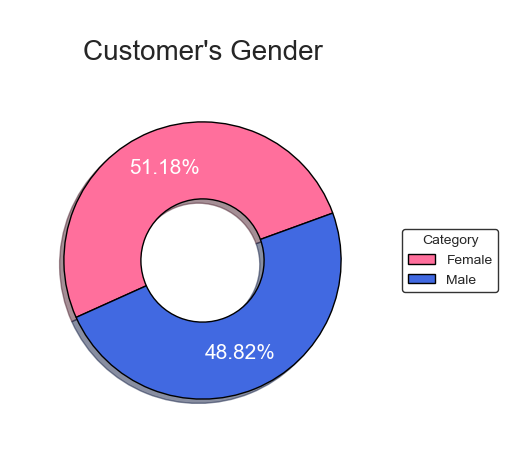

In [10]:
gender_pie(cluster0)

Through the output image above, it is observed that the gender in cluster zero is uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

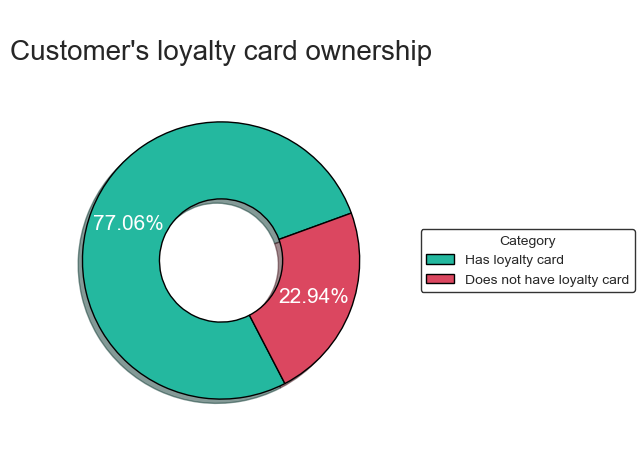

In [11]:
loyalty_card_pie(cluster0)

The output image above shows that most people in cluster zero own a loyalty card.

<br><br>

### **Cluster 1 -  Old and Crancky**

Firtly, 'cluster1' is defined in such a way that contains all the customers that belong to cluster one.

In [12]:
cluster1 = ar_df[ar_df["cluster"]==1]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [13]:
rules_cluster1 = create_ar(cluster1)
rules_cluster1.head(15)

antecedents                consequents  antecedent support  \
96              (french fries)              (cooking oil)            0.256410   
97               (cooking oil)             (french fries)            0.772894   
67                (candy bars)                     (gums)            0.450549   
66                      (gums)               (candy bars)            0.417582   
73                (candy bars)                  (muffins)            0.450549   
72                   (muffins)               (candy bars)            0.384615   
40                      (cake)                (olive oil)            0.644689   
41                 (olive oil)                     (cake)            0.230769   
443        (gums, cooking oil)               (candy bars)            0.315018   
446               (candy bars)        (gums, cooking oil)            0.450549   
457                  (muffins)  (candy bars, cooking oil)            0.384615   
456  (candy bars, cooking oil)                  (muffins)            0.362637   
455     (muffins, cooking oil)               (candy bars)            0.307692   
458               (candy bars)     (muffins, cooking oil)            0.450549   
127              (yogurt cake)              (cooking oil)            0.168498   

     consequent support   support  confidence      lift  leverage  conviction  
96             0.772894  0.212454    0.828571  1.072038  0.014276    1.324786  
97             0.256410  0.212454    0.274882  1.072038  0.014276    1.025473  
67             0.417582  0.201465    0.447154  1.070817  0.013324    1.053491  
66             0.450549  0.201465    0.482456  1.070817  0.013324    1.061650  
73             0.384615  0.190476    0.422764  1.099187  0.017188    1.066089  
72             0.450549  0.190476    0.495238  1.099187  0.017188    1.088534  
40             0.230769  0.161172    0.250000  1.083333  0.012398    1.025641  
41             0.644689  0.161172    0.698413  1.083333  0.012398    1.178138  
443            0.450549  0.157509    0.500000  1.109756  0.015578    1.098901  
446            0.315018  0.157509    0.349593  1.109756  0.015578    1.053159  
457            0.362637  0.153846    0.400000  1.103030  0.014370    1.062271  
456            0.384615  0.153846    0.424242  1.103030  0.014370    1.068826  
455            0.450549  0.153846    0.500000  1.109756  0.015216    1.098901  
458            0.307692  0.153846    0.341463  1.109756  0.015216    1.051282  
127            0.772894  0.150183    0.891304  1.153204  0.019952    2.089377

<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Old and Crancky.

In [14]:
fig = px.scatter_mapbox(cluster1, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10,
                        center = {"lat":38.76 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster one seem to have their residence location spread throughout Lisbon, which does not provide useful insights.

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster one, to understand the distribution of the variable 'education' in this cluster. The function `education_pie` could not be used since there were so many customers with the 'basic' education that the plot looked quite messy.

In [15]:
cluster1["education"].value_counts()

basic    265
Phd        4
Msc        2
Bsc        2
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster the majority of people do not have an education higher than high school.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

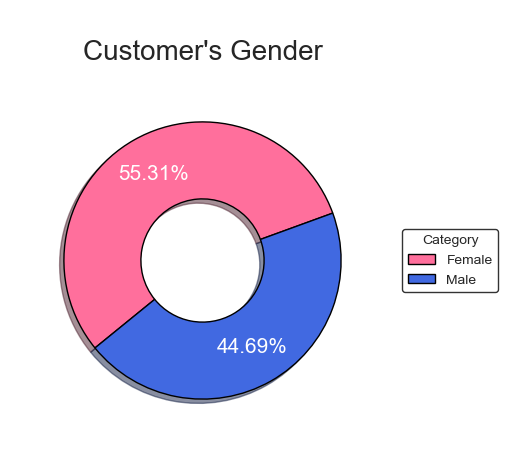

In [16]:
gender_pie(cluster1)

Through the output image above, it is observed that the gender in cluster one is almost uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

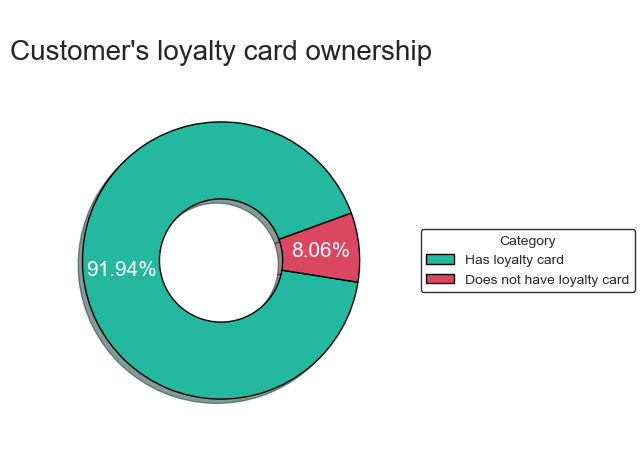

In [17]:
loyalty_card_pie(cluster1)

The output image above shows that most people in cluster one own a loyalty card.

<br><br>

### **Cluster 2 - Young and Drunk**

Firtly, 'cluster2' is defined in such a way that contains all the customers that belong to cluster two.

In [18]:
cluster2 = ar_df[ar_df["cluster"]==2]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [19]:
rules_cluster2 = create_ar(cluster2)
rules_cluster2.head(15)

antecedents                 consequents  \
24                    (bramble)              (dessert wine)   
25               (dessert wine)                   (bramble)   
7                        (beer)                 (champagne)   
6                   (champagne)                      (beer)   
75                (french wine)              (dessert wine)   
76               (dessert wine)               (french wine)   
170                   (bramble)  (dessert wine, white wine)   
171              (dessert wine)       (bramble, white wine)   
168  (dessert wine, white wine)                   (bramble)   
167       (bramble, white wine)              (dessert wine)   
127                      (beer)     (champagne, white wine)   
126                 (champagne)          (beer, white wine)   
124     (champagne, white wine)                      (beer)   
125          (beer, white wine)                 (champagne)   
90                    (ketchup)                (white wine)   

     antecedent support  consequent support   support  confidence      lift  \
24             0.237478            0.413660  0.104028    0.438053  1.058968   
25             0.413660            0.237478  0.104028    0.251482  1.058968   
7              0.330648            0.277408  0.097723    0.295551  1.065401   
6              0.277408            0.330648  0.097723    0.352273  1.065401   
75             0.211208            0.413660  0.092469    0.437811  1.058383   
76             0.413660            0.211208  0.092469    0.223539  1.058383   
170            0.237478            0.328196  0.086865    0.365782  1.114522   
171            0.413660            0.194746  0.086865    0.209992  1.078284   
168            0.328196            0.237478  0.086865    0.264674  1.114522   
167            0.194746            0.413660  0.086865    0.446043  1.078284   
127            0.330648            0.220665  0.078809    0.238347  1.080130   
126            0.277408            0.265149  0.078809    0.284091  1.071439   
124            0.220665            0.330648  0.078809    0.357143  1.080130   
125            0.265149            0.277408  0.078809    0.297226  1.071439   
90             0.091419            0.796848  0.076708    0.839080  1.053000   

     leverage  conviction  
24   0.005793    1.043408  
25   0.005793    1.018709  
7    0.005999    1.025755  
6    0.005999    1.033386  
75   0.005101    1.042958  
76   0.005101    1.015881  
170  0.008926    1.059263  
171  0.006306    1.019298  
168  0.008926    1.036986  
167  0.006306    1.058457  
127  0.005847    1.023215  
126  0.005255    1.026459  
124  0.005847    1.041214  
125  0.005255    1.028199  
90   0.003861    1.262447

<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Young and Drunk.

In [20]:
fig = px.scatter_mapbox(cluster2, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.5,
                        center = {"lat":38.72 , "lon":-9.17},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster two seem to have their residence location in grouped in two different areas of Lisbon. These areas also seem to be around universities. 

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster zero, to understand the distribution of the variable 'education' in this cluster.

In [21]:
cluster2["education"].value_counts()

basic    2855
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people that do not have an education higher than high school. Given their age group, it is possible that some of them are attending university.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

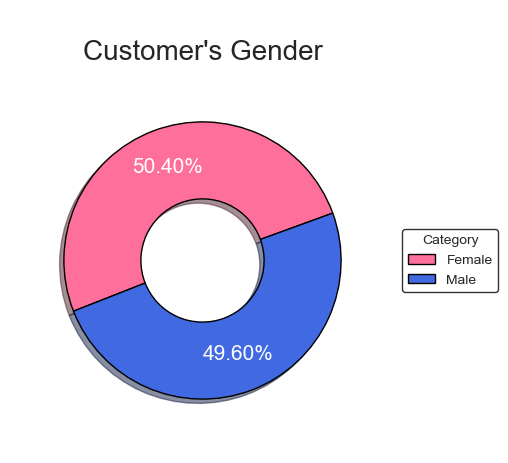

In [22]:
gender_pie(cluster2)

Through the output image above, it is observed that the gender in cluster two is almost uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

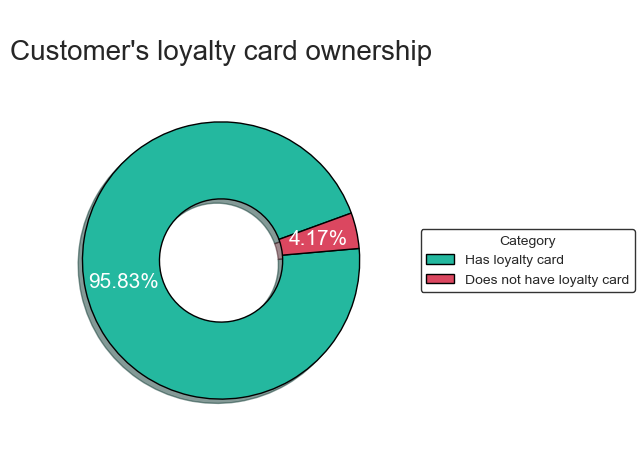

In [23]:
loyalty_card_pie(cluster2)

The output image above shows that most people in cluster two own a loyalty card.

<br>

### **Cluster 3 - Not even average**

Firtly, 'cluster3' is defined in such a way that contains all the customers that belong to cluster three.

In [24]:
cluster3 = ar_df[ar_df["cluster"]==3]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [25]:
rules_cluster3 = create_ar(cluster3)
rules_cluster3.head(15)

antecedents                 consequents  \
105               (french wine)              (dessert wine)   
106              (dessert wine)               (french wine)   
444  (dessert wine, white wine)               (french wine)   
442   (french wine, white wine)              (dessert wine)   
445               (french wine)  (dessert wine, white wine)   
446              (dessert wine)   (french wine, white wine)   
73                  (champagne)               (french wine)   
74                (french wine)                 (champagne)   
309                 (champagne)       (bramble, white wine)   
308       (bramble, white wine)                 (champagne)   
449             (google tablet)  (dessert wine, white wine)   
382               (french wine)       (cider, dessert wine)   
380       (cider, dessert wine)               (french wine)   
379        (cider, french wine)              (dessert wine)   
367               (french wine)     (champagne, white wine)   

     antecedent support  consequent support   support  confidence      lift  \
105            0.255614            0.500794  0.135632    0.530612  1.059542   
106            0.500794            0.255614  0.135632    0.270833  1.059542   
444            0.444092            0.255614  0.120662    0.271706  1.062956   
442            0.228850            0.500794  0.120662    0.527255  1.052838   
445            0.255614            0.444092  0.120662    0.472050  1.062956   
446            0.500794            0.228850  0.120662    0.240942  1.052838   
73             0.345883            0.255614  0.095033    0.274754  1.074881   
74             0.255614            0.345883  0.095033    0.371783  1.074881   
309            0.345883            0.257201  0.093899    0.271475  1.055498   
308            0.257201            0.345883  0.093899    0.365079  1.055498   
449            0.185076            0.444092  0.087548    0.473039  1.065184   
382            0.255614            0.324110  0.087321    0.341615  1.054010   
380            0.324110            0.255614  0.087321    0.269419  1.054010   
379            0.166024            0.500794  0.087321    0.525956  1.050245   
367            0.255614            0.310274  0.086641    0.338953  1.092430   

     leverage  conviction  
105  0.007622    1.063526  
106  0.007622    1.020873  
444  0.007146    1.022096  
442  0.006056    1.055973  
445  0.007146    1.052956  
446  0.006056    1.015930  
73   0.006620    1.026392  
74   0.006620    1.041228  
309  0.004937    1.019593  
308  0.004937    1.030234  
449  0.005358    1.054933  
382  0.004475    1.026588  
380  0.004475    1.018897  
379  0.004178    1.053080  
367  0.007331    1.043384


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Not Even Average.


In [26]:
fig = px.scatter_mapbox(cluster3, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10,
                        center = {"lat":38.76 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster three appear to have their residence location in the same area of Lisbon.

<br>

**2. Education**

In the cell below it is used the function `.education_pie()` on the cluster three, to understand the distribution of the variable 'education' in this cluster. 

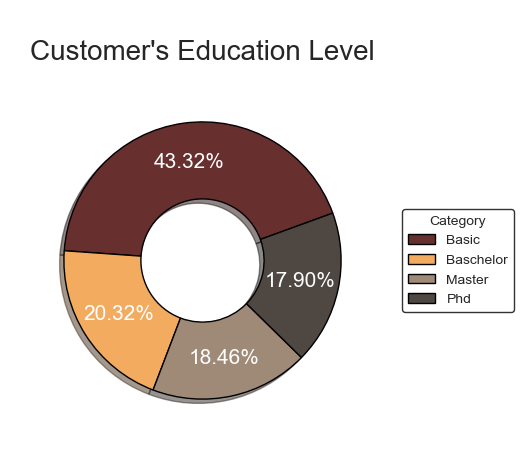

In [27]:
education_pie(cluster3)

It is clear by the visualization of the output above, that in this cluster has much more people with higher education than the previous clusters. 

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.


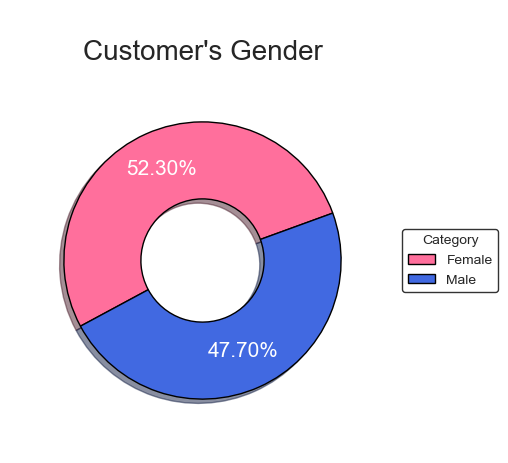

In [28]:
gender_pie(cluster3)

Through the output image above, it is observed that the gender in cluster three is fairly uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

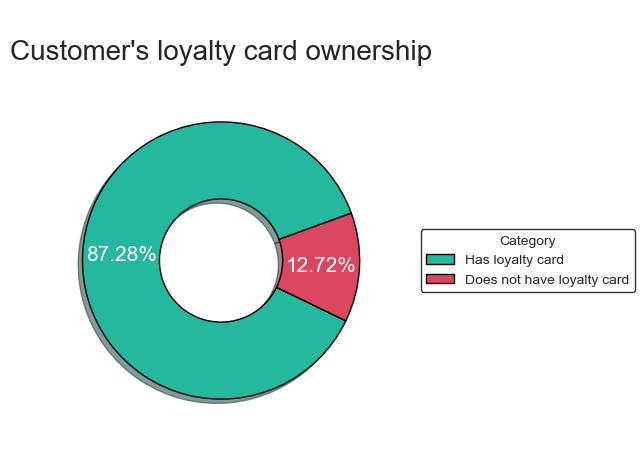

In [29]:
loyalty_card_pie(cluster3)

The output image above shows that most people in cluster three own a loyalty card.

<br>

### **Cluster 4  - Millennials**

Firtly, 'cluster4' is defined in such a way that contains all the customers that belong to cluster four.

In [30]:
cluster4 = ar_df[ar_df["cluster"]==4]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [31]:
rules_cluster4 = create_ar(cluster4)
rules_cluster4.head(15)

antecedents          consequents  antecedent support  \
14                (french fries)               (cake)            0.199782   
13                        (cake)       (french fries)            0.506962   
225               (french fries)          (cake, oil)            0.199782   
222                  (cake, oil)       (french fries)            0.448480   
224          (oil, french fries)               (cake)            0.172902   
185          (cake, cooking oil)       (french fries)            0.335513   
187  (french fries, cooking oil)               (cake)            0.131977   
188               (french fries)  (cake, cooking oil)            0.199782   
99                     (muffins)        (fresh bread)            0.300278   
100                (fresh bread)            (muffins)            0.209711   
107                    (ketchup)               (gums)            0.177988   
259                   (pet food)          (cake, oil)            0.139242   
258              (oil, pet food)               (cake)            0.123865   
511         (cake, french fries)   (oil, cooking oil)            0.107640   
512  (french fries, cooking oil)          (cake, oil)            0.131977   

     consequent support   support  confidence      lift  leverage  conviction  
14             0.506962  0.107640    0.538788  1.062777  0.006358    1.069005  
13             0.199782  0.107640    0.212324  1.062777  0.006358    1.015923  
225            0.448480  0.095290    0.476970  1.063524  0.005692    1.054470  
222            0.199782  0.095290    0.212473  1.063524  0.005692    1.016115  
224            0.506962  0.095290    0.551120  1.087104  0.007635    1.098375  
185            0.199782  0.072406    0.215807  1.080210  0.005376    1.020434  
187            0.506962  0.072406    0.548624  1.082179  0.005498    1.092299  
188            0.335513  0.072406    0.362424  1.080210  0.005376    1.042209  
99             0.209711  0.068531    0.228226  1.088289  0.005560    1.023990  
100            0.300278  0.068531    0.326790  1.088289  0.005560    1.039381  
107            0.355370  0.066957    0.376190  1.058588  0.003706    1.033376  
259            0.448480  0.066594    0.478261  1.066403  0.004147    1.057079  
258            0.506962  0.066594    0.537634  1.060502  0.003799    1.066338  
511            0.575978  0.065383    0.607424  1.054596  0.003385    1.080103  
512            0.448480  0.065383    0.495413  1.104648  0.006194    1.093011


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Millennials.

In [32]:
fig = px.scatter_mapbox(cluster4, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=11,
                        center = {"lat":38.76 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster four appear to have their residence set to different areas in Lisbon.


<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster four, to understand the distribution of the variable 'education' in this cluster.

In [33]:
cluster4["education"].value_counts()

Bsc    2949
Phd    2691
Msc    2619
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people with higher education.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

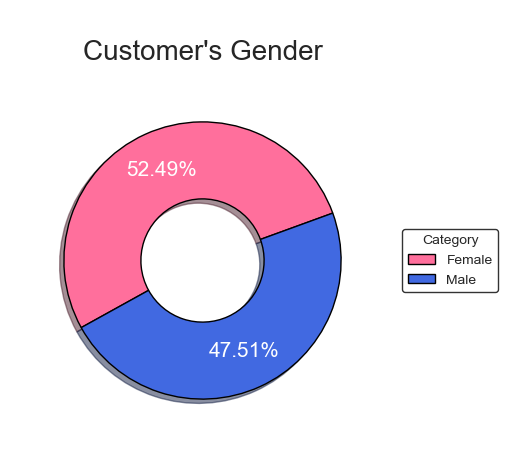

In [34]:
gender_pie(cluster4)


Through the output image above, it is observed that the gender in cluster four is almost uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

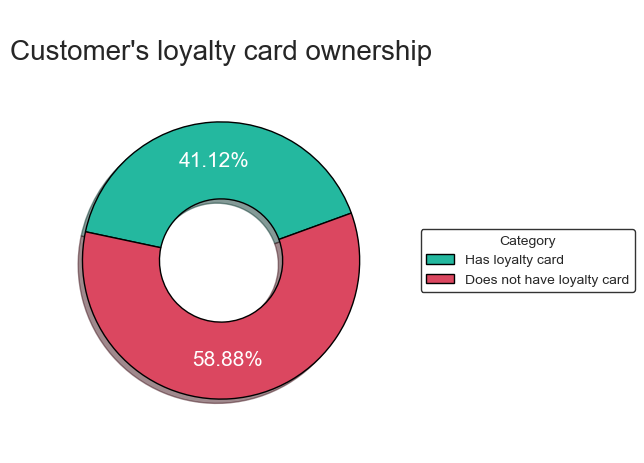

In [35]:
loyalty_card_pie(cluster4)


The output image above shows that most people in cluster four do not own a loyalty card. Although there is not a significant different between the percentage of people that own and those who do not own, contrarily to the previous clusters.

<br>

### **Cluster 5 -  Gamers**

Firtly, 'cluster5' is defined in such a way that contains all the customers that belong to cluster five.

In [36]:
cluster5 = ar_df[ar_df["cluster"]==5]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 


In [37]:
rules_cluster5 = create_ar(cluster5)
rules_cluster5.head(15)

antecedents  \
310                 (pokemon scarlet, pokemon violet)   
315                                  (pokemon shield)   
532  (pokemon scarlet, pokemon sword, pokemon violet)   
540                   (pokemon sword, pokemon shield)   
537                 (pokemon scarlet, pokemon violet)   
436                                  (pokemon violet)   
432                (ratchet & clank 2, pokemon sword)   
401                                 (ratchet & clank)   
398                  (pokemon violet, pokemon shield)   
397                 (pokemon violet, ratchet & clank)   
595                  (pokemon sword, ratchet & clank)   
596                 (pokemon violet, ratchet & clank)   
597                  (pokemon violet, pokemon shield)   
598                 (ratchet & clank, pokemon shield)   
599                                 (ratchet & clank)   

                                         consequents  antecedent support  \
310                                 (pokemon shield)            0.203690   
315                (pokemon scarlet, pokemon violet)            0.652953   
532                                 (pokemon shield)            0.181211   
540                (pokemon scarlet, pokemon violet)            0.574594   
537                  (pokemon sword, pokemon shield)            0.203690   
436               (ratchet & clank 2, pokemon sword)            0.496130   
432                                 (pokemon violet)            0.209310   
401                 (pokemon violet, pokemon shield)            0.294136   
398                                (ratchet & clank)            0.327325   
397                                 (pokemon shield)            0.146538   
595                 (pokemon violet, pokemon shield)            0.260100   
596                  (pokemon sword, pokemon shield)            0.146538   
597                 (pokemon sword, ratchet & clank)            0.327325   
598                  (pokemon sword, pokemon violet)            0.196162   
599  (pokemon sword, pokemon violet, pokemon shield)            0.294136   

     consequent support   support  confidence      lift  leverage  conviction  
310            0.652953  0.139858    0.686622  1.051563  0.006858    1.107437  
315            0.203690  0.139858    0.214193  1.051563  0.006858    1.013366  
532            0.652953  0.125119    0.690462  1.057446  0.006797    1.121178  
540            0.203690  0.125119    0.217752  1.069038  0.008080    1.017977  
537            0.574594  0.125119    0.614263  1.069038  0.008080    1.102840  
436            0.209310  0.109426    0.220560  1.053749  0.005582    1.014434  
432            0.496130  0.109426    0.522796  1.053749  0.005582    1.055881  
401            0.327325  0.101368    0.344629  1.052865  0.005090    1.026403  
398            0.294136  0.101368    0.309686  1.052865  0.005090    1.022525  
397            0.652953  0.101368    0.691751  1.059419  0.005685    1.125866  
595            0.327325  0.090977    0.349776  1.068589  0.005839    1.034528  
596            0.574594  0.090977    0.620839  1.080483  0.006777    1.121967  
597            0.260100  0.090977    0.277940  1.068589  0.005839    1.024707  
598            0.438766  0.090977    0.463784  1.057019  0.004908    1.046657  
599            0.290425  0.090977    0.309301  1.064992  0.005552    1.027328


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Gamers.

In [38]:
fig = px.scatter_mapbox(cluster5, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.7,
                        center = {"lat":38.74 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster five appear to have their residence location concentrated in a big area of Lisbon.

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster five, to understand the distribution of the variable 'education' in this cluster. 

In [39]:
cluster5["education"].value_counts()

Msc    3187
Phd    3130
Bsc    3114
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people with higher education.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

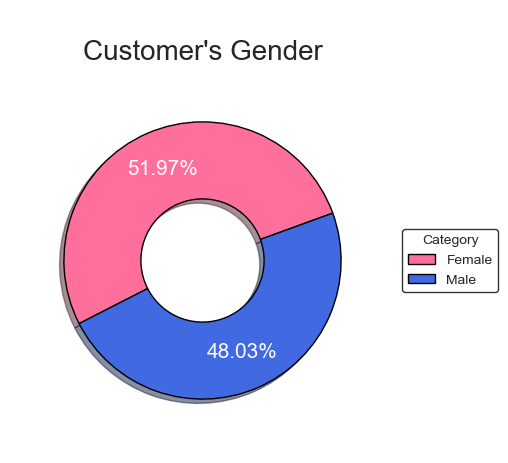

In [40]:
gender_pie(cluster5)

Through the output image above, it is observed that the gender in cluster five is fairly uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

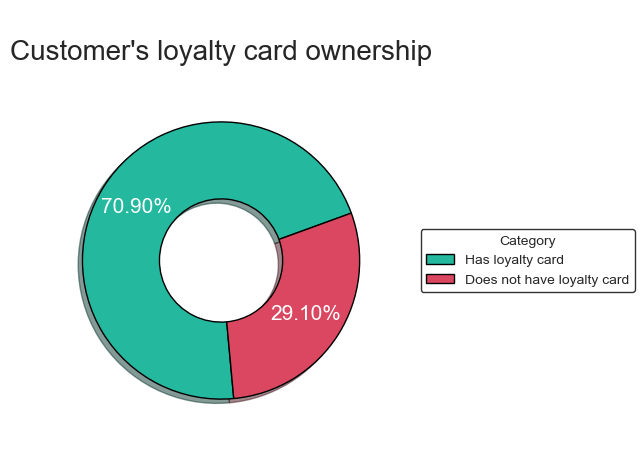

In [41]:
loyalty_card_pie(cluster5)

The output image above shows that most people in cluster five own a loyalty card.

<br>

### **Cluster 6 - Parents**

Firtly, 'cluster6' is defined in such a way that contains all the customers that belong to cluster six.

In [42]:
cluster6 = ar_df[ar_df["cluster"]==6]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [43]:
rules_cluster6 = create_ar(cluster6)
rules_cluster6.head(15)

antecedents                       consequents  \
504                   (gums, candy bars)               (cake, babies food)   
613  (napkins, babies food, cooking oil)                      (candy bars)   
639                            (muffins)  (gums, babies food, cooking oil)   
638                  (gums, cooking oil)            (muffins, babies food)   
635               (muffins, babies food)               (gums, cooking oil)   
633     (gums, babies food, cooking oil)                         (muffins)   
394                   (cake, candy bars)                         (napkins)   
396                            (napkins)                (cake, candy bars)   
628                  (soup, cooking oil)         (babies food, candy bars)   
624     (babies food, soup, cooking oil)                      (candy bars)   
342                            (ketchup)               (gums, babies food)   
341               (babies food, ketchup)                            (gums)   
400                               (soup)                (cake, candy bars)   
399                   (soup, candy bars)                            (cake)   
398                         (cake, soup)                      (candy bars)   

     antecedent support  consequent support   support  confidence      lift  \
504            0.142335            0.450715  0.067542    0.474530  1.052837   
613            0.151088            0.413940  0.065909    0.436230  1.053850   
639            0.297407            0.201450  0.063165    0.212387  1.054293   
638            0.229146            0.261284  0.063165    0.275656  1.055003   
635            0.261284            0.229146  0.063165    0.241750  1.055003   
633            0.201450            0.297407  0.063165    0.313554  1.054293   
394            0.217519            0.265791  0.060749    0.279279  1.050746   
396            0.265791            0.217519  0.060749    0.228557  1.050746   
628            0.154746            0.366190  0.060487    0.390882  1.067431   
624            0.136848            0.413940  0.060487    0.442005  1.067800   
342            0.183487            0.308381  0.060422    0.329299  1.067832   
341            0.162715            0.349860  0.060422    0.371337  1.061388   
400            0.239402            0.217519  0.055327    0.231105  1.062459   
399            0.100725            0.514599  0.055327    0.549287  1.067407   
398            0.125678            0.413940  0.055327    0.440229  1.063510   

     leverage  conviction  
504  0.003390    1.045320  
613  0.003368    1.039538  
639  0.003253    1.013887  
638  0.003293    1.019841  
635  0.003293    1.016622  
633  0.003253    1.023523  
394  0.002934    1.018714  
396  0.002934    1.014309  
628  0.003821    1.040538  
624  0.003841    1.050297  
342  0.003838    1.031188  
341  0.003495    1.034163  
400  0.003252    1.017669  
399  0.003494    1.076961  
398  0.003304    1.046964


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Parents.

In [44]:
fig = px.scatter_mapbox(cluster6, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.7,
                        center = {"lat":38.74 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster six appear to have their residence location spread throughout two big areas in Lisbon. 

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster five, to understand the distribution of the variable 'education' in this cluster.

In [45]:
cluster6["education"].value_counts()

Bsc    5292
Msc    5118
Phd    4899
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people that have a higher level education than high school.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

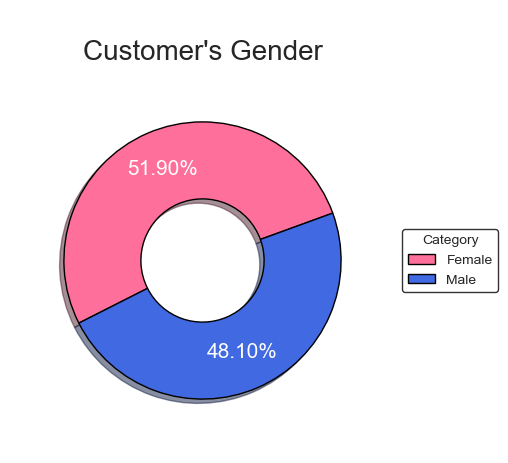

In [46]:
gender_pie(cluster6)

Through the output image above, it is observed that the gender in cluster six is fairly uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.


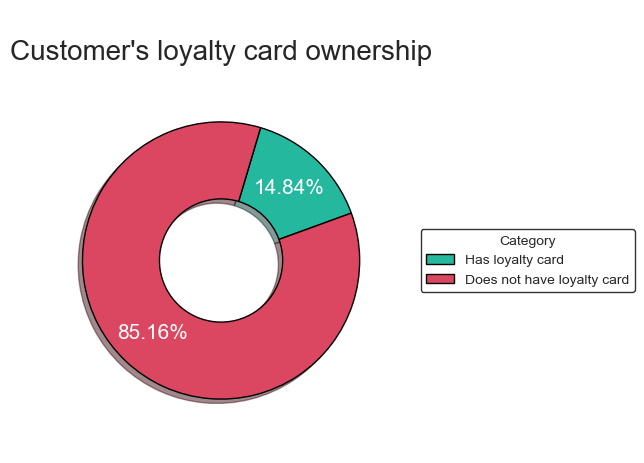

In [47]:
loyalty_card_pie(cluster6)

The output image above shows that most people in cluster six do not own a loyalty card.

<br>

### **Cluster 7 - Vegetarians**

Firtly, 'cluster7' is defined in such a way that contains all the customers that belong to cluster seven.

In [48]:
cluster7 = ar_df[ar_df["cluster"]==7]

Then, the association rules are created and the first fifteen with the highest lift are displayed.

In [49]:
rules_cluster7 = create_ar(cluster7)
rules_cluster7.head(15)

antecedents                 consequents  antecedent support  \
292              (toothpaste)       (asparagus, tomatoes)            0.143086   
92              (green beans)                    (melons)            0.208262   
93                   (melons)               (green beans)            0.290561   
591  (asparagus, green beans)   (mashed potato, tomatoes)            0.155501   
419   (green beans, tomatoes)                    (melons)            0.183219   
420        (melons, tomatoes)               (green beans)            0.255137   
421             (green beans)          (melons, tomatoes)            0.208262   
129      (asparagus, avocado)             (mashed potato)            0.131100   
131                 (avocado)  (asparagus, mashed potato)            0.173587   

     consequent support   support  confidence      lift  leverage  conviction  
292            0.656036  0.098887    0.691099  1.053448  0.005017    1.113511  
92             0.290561  0.063784    0.306269  1.054063  0.003271    1.022643  
93             0.208262  0.063784    0.219521  1.054063  0.003271    1.014426  
591            0.350385  0.057791    0.371645  1.060675  0.003306    1.033834  
419            0.290561  0.056400    0.307827  1.059424  0.003164    1.024945  
420            0.208262  0.056400    0.221057  1.061437  0.003264    1.016426  
421            0.255137  0.056400    0.270812  1.061437  0.003264    1.021496  
129            0.401220  0.055330    0.422041  1.051894  0.002730    1.036025  
131            0.301691  0.055330    0.318742  1.056519  0.002960    1.025029


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Vegetarians.

In [50]:
fig = px.scatter_mapbox(cluster7, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.7,
                        center = {"lat":38.74 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster seven appear to have their residence location spread throughout a big area of Lisbon.

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster seven, to understand the distribution of the variable 'education' in this cluster.

In [51]:
cluster7["education"].value_counts()

Msc    3215
Phd    3120
Bsc    3009
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people that have an education higher than high school.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

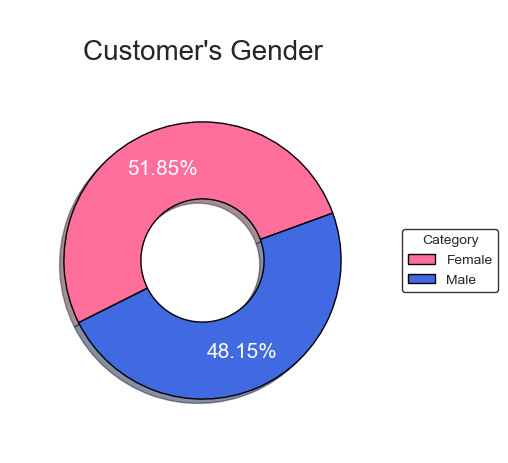

In [52]:
gender_pie(cluster7)

Through the output image above, it is observed that the gender in cluster seven is almost uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

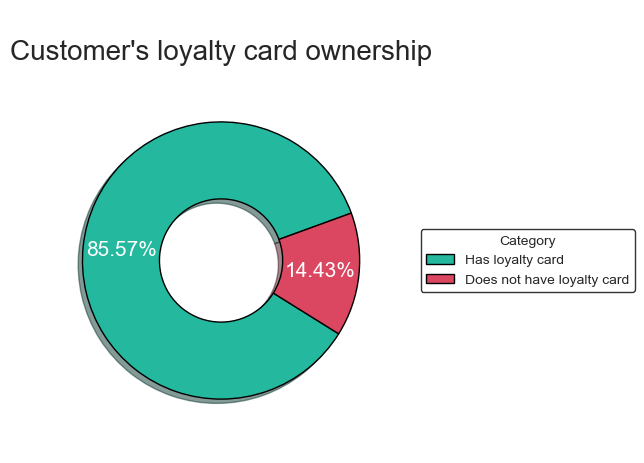

In [53]:
loyalty_card_pie(cluster7)

The output image above shows that most people in cluster seven own a loyalty card.

<br>

### **Cluster 8 - The Heart of The Company**

Firtly, 'cluster8' is defined in such a way that contains all the customers that belong to cluster eight.

In [54]:
cluster8 = ar_df[ar_df["cluster"]==8]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [55]:
rules_cluster8 = create_ar(cluster8)
rules_cluster8.head(15)

antecedents     consequents  antecedent support  \
433  (fresh bread, oil)       (napkins)            0.188179   
434      (napkins, oil)   (fresh bread)            0.232134   
435       (fresh bread)  (napkins, oil)            0.214542   

     consequent support   support  confidence      lift  leverage  conviction  
433            0.265574  0.052626    0.279661  1.053045  0.002651    1.019557  
434            0.214542  0.052626    0.226707  1.056701  0.002824    1.015731  
435            0.232134  0.052626    0.245296  1.056701  0.002824    1.017440


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Heart of The Company.

In [56]:
fig = px.scatter_mapbox(cluster8, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.7,
                        center = {"lat":38.74 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster eight appear to have their residence location spread throughout a big area of Lisbon.

<br>

**2. Education**

In the cell below it is used the method `.value_counts()` on the 'education' column of cluster eight, to understand the distribution of the variable 'education' in this cluster. 

In [57]:
cluster8["education"].value_counts()

Msc    7057
Phd    6643
Bsc    6366
Name: education, dtype: int64

It is clear by the visualization of the output above, that in this cluster there are only people that have a higher level education.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

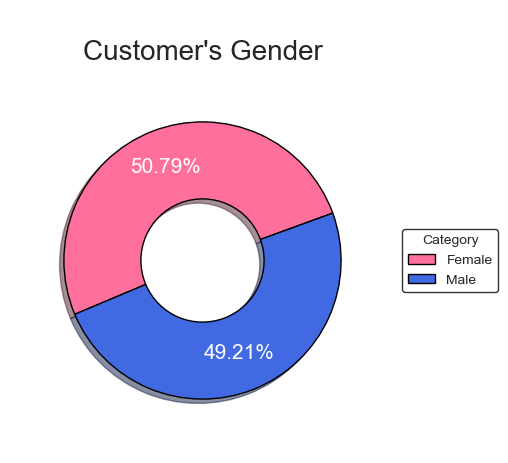

In [58]:
gender_pie(cluster8)

Through the output image above, it is observed that the gender in cluster eight is fairly uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the method `.value_counts` on the 'loyalty_card_pie' column of cluster eight, to understand the distribution of the variable 'loyalty_card_pie' in this cluster. The function `loyalty_card_pie` was not used, since it can only be used if the column contains all its values (0 and 1).

In [59]:
cluster8["has_loyalty_card"].value_counts()

1    20066
Name: has_loyalty_card, dtype: int64

The output image above shows that all the customers in cluster eight own a loyalty card, which is coherent with their description.

<br>

### **Cluster 9 - Promotion Seekers**


Firtly, 'cluster9' is defined in such a way that contains all the customers that belong to cluster nine.

In [60]:
cluster9 = ar_df[ar_df["cluster"]==9]

Then, the association rules are created and the first fifteen with the highest lift are displayed. 

In [61]:
rules_cluster9 = create_ar(cluster9)
rules_cluster9.head(15)

antecedents                consequents  antecedent support  \
460          (gums, oil)                  (napkins)            0.309591   
462       (napkins, oil)                     (gums)            0.241906   
463               (gums)             (napkins, oil)            0.349352   
464            (napkins)                (gums, oil)            0.274990   
410           (pet food)         (oil, cooking oil)            0.136584   
44             (ketchup)               (candy bars)            0.177155   
321       (oil, ketchup)               (candy bars)            0.157628   
323            (ketchup)          (oil, candy bars)            0.177155   
636  (gums, cooking oil)             (napkins, oil)            0.230069   
637       (napkins, oil)        (gums, cooking oil)            0.241906   
121            (ketchup)                  (napkins)            0.177155   
290            (ketchup)  (candy bars, cooking oil)            0.177155   
34    (whole wheat rice)                     (cake)            0.091866   

     consequent support   support  confidence      lift  leverage  conviction  
460            0.274990  0.089640    0.289542  1.052920  0.004505    1.020483  
462            0.349352  0.089640    0.370556  1.060694  0.005129    1.033687  
463            0.241906  0.089640    0.256588  1.060694  0.005129    1.019750  
464            0.309591  0.089640    0.325975  1.052920  0.004505    1.024307  
410            0.582355  0.084176    0.616296  1.058282  0.004636    1.088456  
44             0.415217  0.077297    0.436322  1.050830  0.003739    1.037443  
321            0.415217  0.070316    0.446085  1.074342  0.004866    1.055727  
323            0.369081  0.070316    0.396916  1.075416  0.004931    1.046154  
636            0.241906  0.058681    0.255057  1.054364  0.003026    1.017654  
637            0.230069  0.058681    0.242576  1.054364  0.003026    1.016513  
121            0.274990  0.052813    0.298115  1.084096  0.004097    1.032948  
290            0.273068  0.051093    0.288407  1.056173  0.002717    1.021556  
34             0.503339  0.050688    0.551762  1.096204  0.004448    1.108031


<br>

##### **- Visualization**


**1. Scatter mapbox**

In the cell below it is displayed the map with the stored residences of the Promotion Seekers.

In [62]:
fig = px.scatter_mapbox(cluster9, lat='latitude', lon='longitude',
                        mapbox_style='open-street-map', zoom=10.7,
                        center = {"lat":38.74 , "lon":-9.15},
                        width = 600,
                        height = 600
                        )
# Show the map
fig.show()

The customers belonging to cluster nine appear to have their residence location spread throughout a big area of Lisbon.

<br>

**2. Education**

In the cell below it is used the function `.education_pie()` on the cluster nine, to understand the distribution of the variable 'education' in this cluster. 

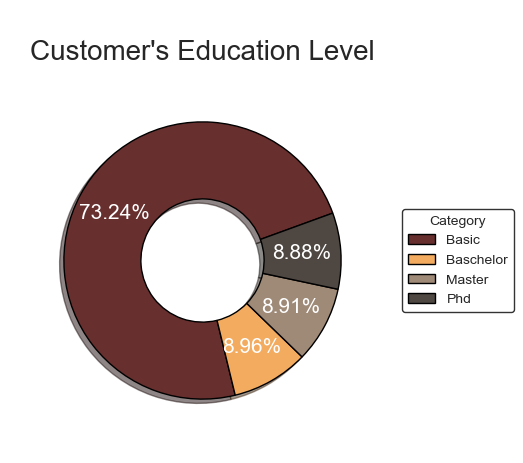

In [63]:
education_pie(cluster9)

It is clear by the visualization of the output above, that in this cluster the majority of people only have at most high school education, although there are people with the three possible values for high education level.

<br>

**3. Gender pie chart**

In the cell below it is used the function `gender_pie` to access the gender distribution in this cluster.

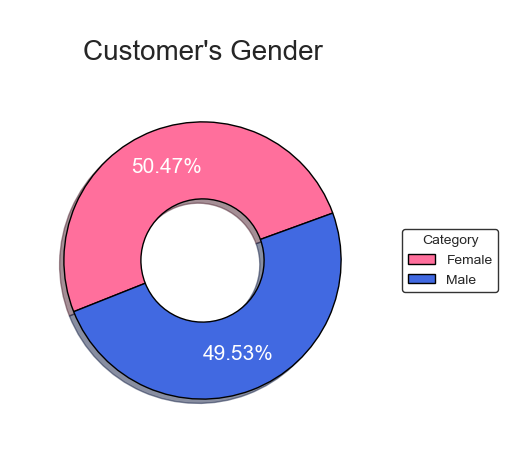

In [64]:
gender_pie(cluster9)


Through the output image above, it is observed that the gender in cluster nine is uniformly distributed.

<br>

**4. Loyalty card pie chart**

In the cell below it is used the function `loyalty_card_pie` to access the amount of people that own a loyalty card vs those who do not own.

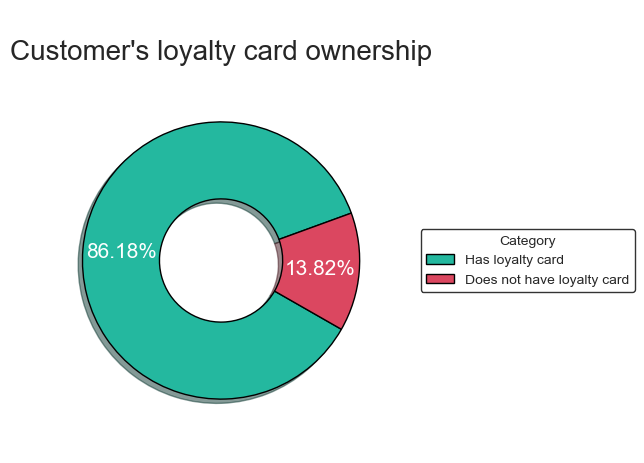

In [65]:
loyalty_card_pie(cluster9)

The output image above shows that most people in cluster nine own a loyalty card.
